In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from energy_forecast.Dataloader import Dataloader
from dotenv import load_dotenv
load_dotenv()

True

In [2]:
Loader = Dataloader()
data = Loader.load_csv()
data.head()

/home/sambegou/projet_bg/src/energy_forecast/Dataloader.py:63: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(filename, delimiter=",")


,nom_methode_dpe,version_methode_dpe,date_etablissement_dpe,consommation_energie,classe_consommation_energie,estimation_ges,classe_estimation_ges,annee_construction,surface_thermique_lot,latitude,longitude,tr001_modele_dpe_type_libelle,tr002_type_batiment_description,code_insee_commune_actualise,tv016_departement_code,geo_adresse,geo_score
0,3CL,"3CL-DPE, version 1.3",2013-04-12,132.0,C,29.0,D,5200,190.0,46.040911,5.317098,Vente,Maison Individuelle,1430.0,1,3 Impasse du Foyer Rural 01160 Varambon,0.4
1,Méthode Facture,NaN,2013-04-20,0.0,N,0.0,N,1947,42.0,NaN,NaN,Vente,Maison Individuelle,83590.0,2,NaN,0.0
2,Méthode 3CL,"3CL-DPE, version 1.3",2013-04-16,326.0,E,18.0,C,2006,107.0,NaN,NaN,Vente,Maison Individuelle,3360.0,3,NaN,0.0
3,Méthode 3CL,"3CL-DPE, version 1.3",2013-05-06,326.0,E,14.0,C,1948,90.0,NaN,NaN,Vente,Logement,4320.0,4,NaN,0.0
4,Méthode 3CL,"3CL-DPE, version 1.3",2013-04-27,221.0,D,3.0,A,2006,78.2,44.773510,6.954523,Location,Logement,5120.0,5,Rue de la Bluette 05460 Abriès-Ristolas,0.4


In [5]:
data.shape

(100008, 17)

In [6]:
data.head()

,nom_methode_dpe,version_methode_dpe,date_etablissement_dpe,consommation_energie,classe_consommation_energie,estimation_ges,classe_estimation_ges,annee_construction,surface_thermique_lot,latitude,longitude,tr001_modele_dpe_type_libelle,tr002_type_batiment_description,code_insee_commune_actualise,tv016_departement_code,geo_adresse,geo_score
0,3CL,"3CL-DPE, version 1.3",2013-04-12,132.0,C,29.0,D,5200,190.0,46.040911,5.317098,Vente,Maison Individuelle,1430.0,1,3 Impasse du Foyer Rural 01160 Varambon,0.4
1,Méthode Facture,NaN,2013-04-20,0.0,N,0.0,N,1947,42.0,NaN,NaN,Vente,Maison Individuelle,83590.0,2,NaN,0.0
2,Méthode 3CL,"3CL-DPE, version 1.3",2013-04-16,326.0,E,18.0,C,2006,107.0,NaN,NaN,Vente,Maison Individuelle,3360.0,3,NaN,0.0
3,Méthode 3CL,"3CL-DPE, version 1.3",2013-05-06,326.0,E,14.0,C,1948,90.0,NaN,NaN,Vente,Logement,4320.0,4,NaN,0.0
4,Méthode 3CL,"3CL-DPE, version 1.3",2013-04-27,221.0,D,3.0,A,2006,78.2,44.773510,6.954523,Location,Logement,5120.0,5,Rue de la Bluette 05460 Abriès-Ristolas,0.4


In [7]:
table_schema = pd.read_json("dpe-france-tableschema.json").transpose()
columns_names = table_schema.values[0]
title = []
for i in range(len(columns_names)):
    try:
        title.append(columns_names[i]['title'])
    except:
        title.append(columns_names[i]['name'])

In [8]:
title

['Nom de la méthode DPE utilisée',
 'Version de la méthode DPE utilisée',
 'Date DPE',
 'Consommation énergie en kWhEP/m².an',
 "Classement consommation d'énergie",
 'Estimation GES en Kg eqCO2/m².an',
 'Classement GES',
 'Année de construction ou évaluation de cette date',
 "Surface thermique du lot pour un bâtiment à usage principal autre qu'habitation",
 'Latitude du Bâtiment',
 'Longitude du Bâtiment',
 'Type de DPE',
 'Type de bâtiment',
 'Code INSEE Commune',
 'Code département',
 'geo_adresse',
 'geo_score']

In [9]:
columns_drop = ["nom_methode_dpe", "version_methode_dpe", "date_etablissement_dpe", 
                "geo_adresse", "geo_score", "classe_consommation_energie", "classe_estimation_ges", 
                "latitude", "longitude", "tv016_departement_code",]

In [10]:
data.drop(columns=columns_drop, inplace=True)

In [33]:
data.head()

,consommation_energie,estimation_ges,annee_construction,surface_thermique_lot,tr001_modele_dpe_type_libelle,tr002_type_batiment_description,code_insee_commune_actualise
0,132.0,29.0,5200,190.0,Vente,Maison Individuelle,1430.0
1,0.0,0.0,1947,42.0,Vente,Maison Individuelle,83590.0
2,326.0,18.0,2006,107.0,Vente,Maison Individuelle,3360.0
3,326.0,14.0,1948,90.0,Vente,Logement,4320.0
4,221.0,3.0,2006,78.2,Location,Logement,5120.0


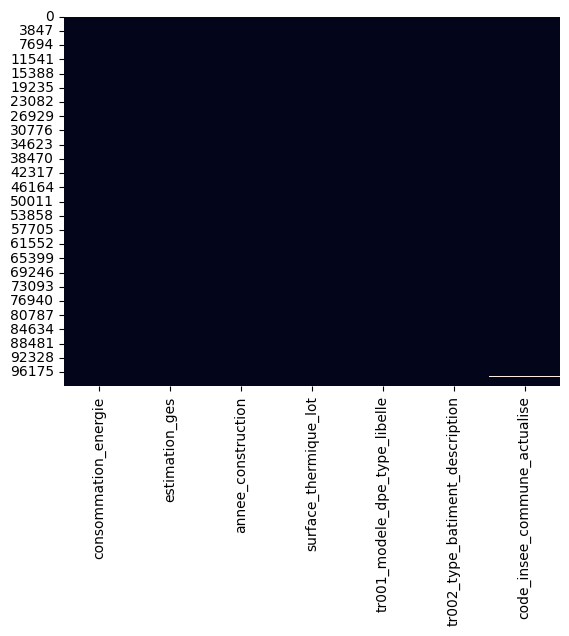

In [11]:
sns.heatmap(data.isnull(), cbar=False)
plt.show()

In [12]:
data.isnull().sum()

consommation_energie                 0
estimation_ges                       0
annee_construction                   0
surface_thermique_lot                2
tr001_modele_dpe_type_libelle        0
tr002_type_batiment_description      0
code_insee_commune_actualise       167
dtype: int64

In [13]:
import re
data["code_insee_commune_actualise"] = data["code_insee_commune_actualise"].\
    apply(lambda x: float(re.sub('[^0-9]', '', str(x))) if re.sub('[^0-9]', '', str(x)) else 0)

In [14]:
data["code_insee_commune_actualise"].value_counts()

10387.0    2275
63000.0    1730
4112.0     1412
6088.0     1261
5018.0     1107
           ... 
1175.0        1
9050.0        1
9212.0        1
4169.0        1
30230.0       1
Name: code_insee_commune_actualise, Length: 5121, dtype: int64

In [15]:
data.isnull().sum()

consommation_energie               0
estimation_ges                     0
annee_construction                 0
surface_thermique_lot              2
tr001_modele_dpe_type_libelle      0
tr002_type_batiment_description    0
code_insee_commune_actualise       0
dtype: int64

In [19]:
data["surface_thermique_lot"].fillna(0, inplace=True)

In [20]:
df = pd.get_dummies(data)

In [21]:
data.isnull().sum()

consommation_energie               0
estimation_ges                     0
annee_construction                 0
surface_thermique_lot              0
tr001_modele_dpe_type_libelle      0
tr002_type_batiment_description    0
code_insee_commune_actualise       0
dtype: int64

In [23]:
df = df.reindex(sorted(df.columns), axis=1)

In [24]:
df.head()

,annee_construction,code_insee_commune_actualise,consommation_energie,estimation_ges,surface_thermique_lot,tr001_modele_dpe_type_libelle_Bâtiment public,tr001_modele_dpe_type_libelle_Copropriété,tr001_modele_dpe_type_libelle_Location,tr001_modele_dpe_type_libelle_Neuf,tr001_modele_dpe_type_libelle_Vente,tr002_type_batiment_description_Bâtiment collectif à usage principal d'habitation,tr002_type_batiment_description_Logement,tr002_type_batiment_description_Maison Individuelle
0,5200,14300.0,132.0,29.0,190.0,0,0,0,0,1,0,0,1
1,1947,835900.0,0.0,0.0,42.0,0,0,0,0,1,0,0,1
2,2006,33600.0,326.0,18.0,107.0,0,0,0,0,1,0,0,1
3,1948,43200.0,326.0,14.0,90.0,0,0,0,0,1,0,1,0
4,2006,51200.0,221.0,3.0,78.2,0,0,1,0,0,0,1,0


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

In [47]:
#train test split
X = df.drop(columns=["consommation_energie", "estimation_ges"])
y1 = df["consommation_energie"]
y2 = df["estimation_ges"]
lr_consommation = LinearRegression()
xg_consommation = XGBRegressor()
lr_ges = LinearRegression()
xg_ges = XGBRegressor()
rf_consommation = RandomForestRegressor()
rf_ges = RandomForestRegressor()
scaler = StandardScaler()

In [274]:
def train_test(X, y, models):
    X = scaler.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    results = pd.DataFrame()
    for model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        model_name = model.__class__.__name__
        results[model_name+" train score"] = [model.score(X_train, y_train)]
        results[model_name+" test score"] = [model.score(X_test, y_test)]
        results.index = ["R2 score"]
    return results


In [275]:
train_test(X, y1, [xg_consommation, rf_consommation])

,XGBRegressor train score,XGBRegressor test score,RandomForestRegressor train score,RandomForestRegressor test score
R2 score,0.454747,0.317332,0.695567,0.116571


In [276]:
train_test(X, y2, [rf_ges, xg_ges])

,RandomForestRegressor train score,RandomForestRegressor test score,XGBRegressor train score,XGBRegressor test score
R2 score,0.672743,0.075417,0.409809,0.269272


In [279]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import r2_score
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.3, random_state=42)
param_xgb = {'n_estimators': [100, 300, 500],
        'max_depth': [3, 4, 5],
        'learning_rate': [0.01, 0.1, 0.3],
        'subsample': [0.5, 0.8, 1.0],
        'colsample_bytree': [0.5, 0.8, 1.0],
        'gamma': [0, 1, 5]}

search = GridSearchCV(xg_consommation, param_xgb, cv=5)
search.fit(X, y1)
print(f"========== Pour le model {xg_consommation.__class__.__name__} : =============")
print("Meilleurs paramètres: ", search.best_params_)
print("Meilleur score: ", search.best_score_)
best_model = search.best_estimator_
y_pred = best_model.predict(X_test)
print("Test Accuracy:", r2_score(y_test, y_pred))

========== Pour le model XGBRegressor : =============
Meilleurs paramètres:  {'colsample_bytree': 1.0, 'gamma': 1, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.8}
Meilleur score:  0.2793085182026648
Test Accuracy: 0.3875928570133417


In [ ]:
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.3, random_state=42)
param_xgb = {'n_estimators': [100, 300, 500],
        'max_depth': [3, 4, 5],
        'learning_rate': [0.01, 0.1, 0.3],
        'subsample': [0.5, 0.8, 1.0],
        'colsample_bytree': [0.5, 0.8, 1.0],
        'gamma': [0, 1, 5]}

search = GridSearchCV(xg_consommation, param_xgb, cv=5)
search.fit(X, y1)
print(f"========== Pour le model {xg_consommation.__class__.__name__} : =============")
print("Meilleurs paramètres: ", search.best_params_)
print("Meilleur score: ", search.best_score_)
best_model = search.best_estimator_
y_pred = best_model.predict(X_test)
print("Test Accuracy:", r2_score(y_test, y_pred))
print("="*100)


In [21]:
from pycaret.regression import *
X = df.drop(columns=["estimation_ges"])
s = setup(X, target = "consommation_energie", session_id = 120)

,Description,Value
0,Session id,120
1,Target,consommation_energie
2,Target type,Regression
3,Original data shape,"(100008, 12)"
4,Transformed data shape,"(100008, 12)"
5,Transformed train set shape,"(70005, 12)"
6,Transformed test set shape,"(30003, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


In [22]:
best = s.compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,86.0384,14556.8591,120.5998,0.3599,2.1033,0.3680,1.4320
lightgbm,Light Gradient Boosting Machine,88.3474,14783.8942,121.5418,0.3498,2.1333,0.3818,440.7030
gbr,Gradient Boosting Regressor,93.5015,16126.5610,126.9433,0.2908,2.1707,0.4029,13.8400
knn,K Neighbors Regressor,97.1898,19221.4830,138.6105,0.1543,2.1540,0.4347,0.6160
ada,AdaBoost Regressor,108.6494,20015.4356,141.1095,0.1219,2.2839,0.5743,7.8840
ridge,Ridge Regression,109.9091,21608.1792,146.9611,0.0492,2.3219,0.4480,0.4560
br,Bayesian Ridge,109.9155,21608.0146,146.9605,0.0492,2.3218,0.4482,0.3170
lar,Least Angle Regression,109.6390,21609.2664,146.9659,0.0491,2.3234,0.4369,0.2330
lr,Linear Regression,109.9099,21608.6057,146.9626,0.0491,2.3219,0.4480,7.0140
lasso,Lasso Regression,110.3921,21619.3980,147.0005,0.0487,2.3221,0.4614,4.4130


In [23]:
best

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device='cpu', early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=-1,
             num_parallel_tree=None, random_state=120, ...)